In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
boundaries = [
        ([to255(20,360), to255(40,100), to255(60,100)], [to255(65,360), to255(100,100), to255(100,100)]),     #AMARILLO
        ([to255(100,360), to255(35,100), to255(40,100)], [to255(160,360), to255(100,100), to255(100,100)]),   #AZUL
        ([to255(10,360), to255(50,100), to255(55,100)], [to255(35,360), to255(98,100), to255(98,100)]),       #NARANJA
        ([to255(0,360), to255(55,100), to255(50,100)], [to255(10,360), to255(100,100), to255(80,100)]),       #ROJO
        ([to255(60,360), to255(30,100), to255(10,100)], [to255(120,360), to255(100,100), to255(100,100)]),    #VERDE
        ([to255(180,360), to255(0,100), to255(0,100)], [to255(240,360), to255(70,100), to255(70,100)]),       #MORADO
        ([to255(200,360), to255(20,100), to255(75,100)], [to255(360,360), to255(100,100), to255(100,100)]),   #ROSA
        ]

def display(img, cmap = None):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

def to255(num, val):
    x = (num*255)//val
    return x

def find_center(img, color):
    
    global boundaries

    kernel = np.ones(shape = (4,4), dtype = np.uint8)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    if color == "orange":
        lower = np.array(boundaries[2][0], dtype = "uint8")
        upper = np.array(boundaries[2][1], dtype = "uint8")
    elif color == "red":
        lower = np.array(boundaries[3][0], dtype = "uint8")
        upper = np.array(boundaries[3][1], dtype = "uint8")
    elif color == "green":
        lower = np.array(boundaries[4][0], dtype = "uint8")
        upper = np.array(boundaries[4][1], dtype = "uint8")
    elif color == "pink":
        lower = np.array(boundaries[6][0], dtype = "uint8")
        upper = np.array(boundaries[6][1], dtype = "uint8")
    elif color == "purple":
        lower = np.array(boundaries[5][0], dtype = "uint8")
        upper = np.array(boundaries[5][1], dtype = "uint8")
        
    mask = cv2.inRange(hsv_img, lower, upper)
    result = cv2.bitwise_and(rgb_img, rgb_img, mask = mask)
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(gray, 25, 255, cv2.THRESH_BINARY)

    eroded = cv2.erode(thresh, kernel, iterations = 1)
    dilated = cv2.dilate(eroded, kernel, iterations = 2)

    image, contours, hierarchy = cv2.findContours(dilated, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) != 0:
        area = max(contours, key = cv2.contourArea)

    conv_hull = cv2.convexHull(area)

    top    = tuple(conv_hull[conv_hull[:,:,1].argmin()][0])
    bottom = tuple(conv_hull[conv_hull[:,:,1].argmax()][0])
    left   = tuple(conv_hull[conv_hull[:,:,0].argmin()][0])
    right  = tuple(conv_hull[conv_hull[:,:,0].argmax()][0])

    cX = (left[0] + right[0]) // 2
    cY = (top[1] + bottom[1]) // 2
    
    return (cX, cY)

def draw_line(img, c1, c2):
    cv2.line(img, c1, c2, color = 255, thickness = 2)
    cv2.circle(img, c1, radius = 3, color = (0,255,0), thickness = -1)
    cv2.circle(img, c2, radius = 3, color = (0,255,0), thickness = -1)
    return img

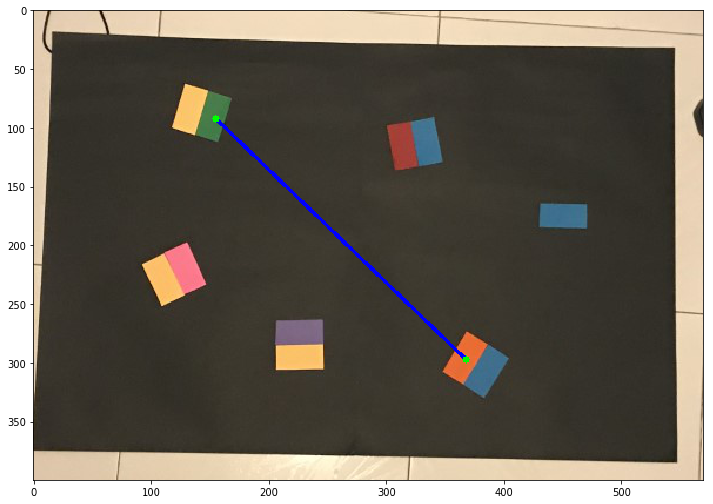

In [28]:
img = cv2.imread('C:/Users/jprr2/Videos/Logitech/LogiCapture/cancha.jpg')
cancha = img[280:680, 360:930, :]

c1 = find_center(cancha, "green")
c2 = find_center(cancha, "orange")
draw_line(cancha, c1, c2)

rgb_img = cv2.cvtColor(cancha, cv2.COLOR_BGR2RGB)

display(rgb_img)